In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [5]:
print(df.shape)
print(df.info())

(58592, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  objec

__Data Processing__

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [9]:
df.describe(include = 'all')

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
count,58592,58592.000000,58592.000000,58592.000000,58592,58592.000000,58592.000000,58592,58592,58592,58592,58592,58592,58592.000000,58592,58592,58592,58592,58592,58592,58592.000000,58592.000000,58592,58592.000000,58592,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592.000000,58592.000000
unique,58592,NaN,NaN,NaN,22,NaN,NaN,6,11,3,9,9,11,NaN,2,2,2,2,2,2,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN
top,ID00001,NaN,NaN,NaN,C8,NaN,NaN,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,NaN,No,Yes,No,Yes,No,Drum,NaN,NaN,Manual,NaN,Power,NaN,NaN,NaN,NaN,NaN,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,NaN,NaN
freq,1,NaN,NaN,NaN,13654,NaN,NaN,18314,14948,20532,17796,17796,14948,NaN,40191,35526,44574,56219,35704,44574,NaN,NaN,38181,NaN,33502,NaN,NaN,NaN,NaN,NaN,33928,41634,41634,38077,32177,42435,42435,57383,34291,36309,42435,58229,NaN,NaN
mean,NaN,0.611246,0.069424,0.469420,NaN,18826.858667,1.763722,NaN,NaN,NaN,NaN,NaN,NaN,3.137066,NaN,NaN,NaN,NaN,NaN,NaN,1162.355851,3.626963,NaN,5.245443,NaN,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.759950,0.063968
std,NaN,0.414156,0.056721,0.122886,NaN,17660.174792,1.136988,NaN,NaN,NaN,NaN,NaN,NaN,1.832641,NaN,NaN,NaN,NaN,NaN,NaN,266.304786,0.483616,NaN,0.430353,NaN,0.228061,311.457119,112.089135,79.62227,212.423085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.389576,0.244698
min,NaN,0.002735,0.000000,0.288462,NaN,290.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,796.000000,3.000000,NaN,5.000000,NaN,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,0.210250,0.020000,0.365385,NaN,6112.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,796.000000,3.000000,NaN,5.000000,NaN,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,0.573792,0.060000,0.451923,NaN,8794.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1197.000000,4.000000,NaN,5.000000,NaN,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000
75%,NaN,1.039104,0.110000,0.548077,NaN,27003.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,1493.000000,4.000000,NaN,5.000000,NaN,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000


In [10]:
# replace yes, no to numeric for visualization
boolean_columns = ['is_esc', 'is_adjustable_steering', 'is_tpms', 
                   'is_parking_sensors', 'is_parking_camera', 
                   'is_front_fog_lights', 'is_rear_window_wiper', 
                   'is_rear_window_washer', 'is_rear_window_defogger', 
                   'is_brake_assist', 'is_power_door_locks', 
                   'is_central_locking', 'is_power_steering', 
                   'is_driver_seat_height_adjustable', 
                   'is_day_night_rear_view_mirror', 'is_ecw', 
                   'is_speed_alert']

# Replace 'No' with 0 and 'Yes' with 1
df[boolean_columns] = df[boolean_columns].replace({'No': 0, 'Yes': 1})

# Optionally, display the first few rows to verify the changes
print(df[boolean_columns].head())

   is_esc  is_adjustable_steering  is_tpms  is_parking_sensors  \
0       0                       0        0                   1   
1       0                       0        0                   1   
2       0                       0        0                   1   
3       1                       1        0                   1   
4       0                       0        0                   0   

   is_parking_camera  is_front_fog_lights  is_rear_window_wiper  \
0                  0                    0                     0   
1                  0                    0                     0   
2                  0                    0                     0   
3                  1                    1                     0   
4                  1                    0                     0   

   is_rear_window_washer  is_rear_window_defogger  is_brake_assist  \
0                      0                        0                0   
1                      0                        0           

/var/folders/5v/wc8gxzt56gx00tb3h88t55vm0000gn/T/ipykernel_2281/4228865890.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[boolean_columns] = df[boolean_columns].replace({'No': 0, 'Yes': 1})


__EDA__

1. Distribution of Target Variable

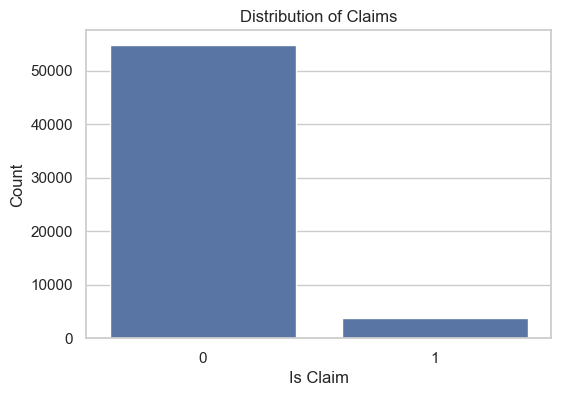

In [11]:
# Set the style for seaborn
sns.set(style='whitegrid')

# Countplot for the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='is_claim', data=df)
plt.title('Distribution of Claims')
plt.xlabel('Is Claim')
plt.ylabel('Count')
plt.show()


2. Correlation Heatmap


The highest correlation with the target variable `is_claim`

In [14]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])


In [15]:
# Calculate the correlation matrix
corr_matrix = df_numeric.corr()


# Get the correlation values for 'is_claim' and sort them
is_claim_corr = corr_matrix['is_claim'].sort_values(ascending=False)

is_claim_corr

is_claim                            1.000000
policy_tenure                       0.078747
age_of_policyholder                 0.022435
is_adjustable_steering              0.013917
cylinder                            0.013434
is_front_fog_lights                 0.011825
is_brake_assist                     0.010893
is_driver_seat_height_adjustable    0.010686
width                               0.009947
is_parking_sensors                  0.008419
is_day_night_rear_view_mirror       0.007989
displacement                        0.007678
is_speed_alert                      0.007307
is_ecw                              0.006637
is_central_locking                  0.006637
is_power_door_locks                 0.006637
length                              0.006495
gross_weight                        0.003894
ncap_rating                         0.003800
is_esc                              0.002995
airbags                             0.002789
turning_radius                      0.002724
is_rear_wi

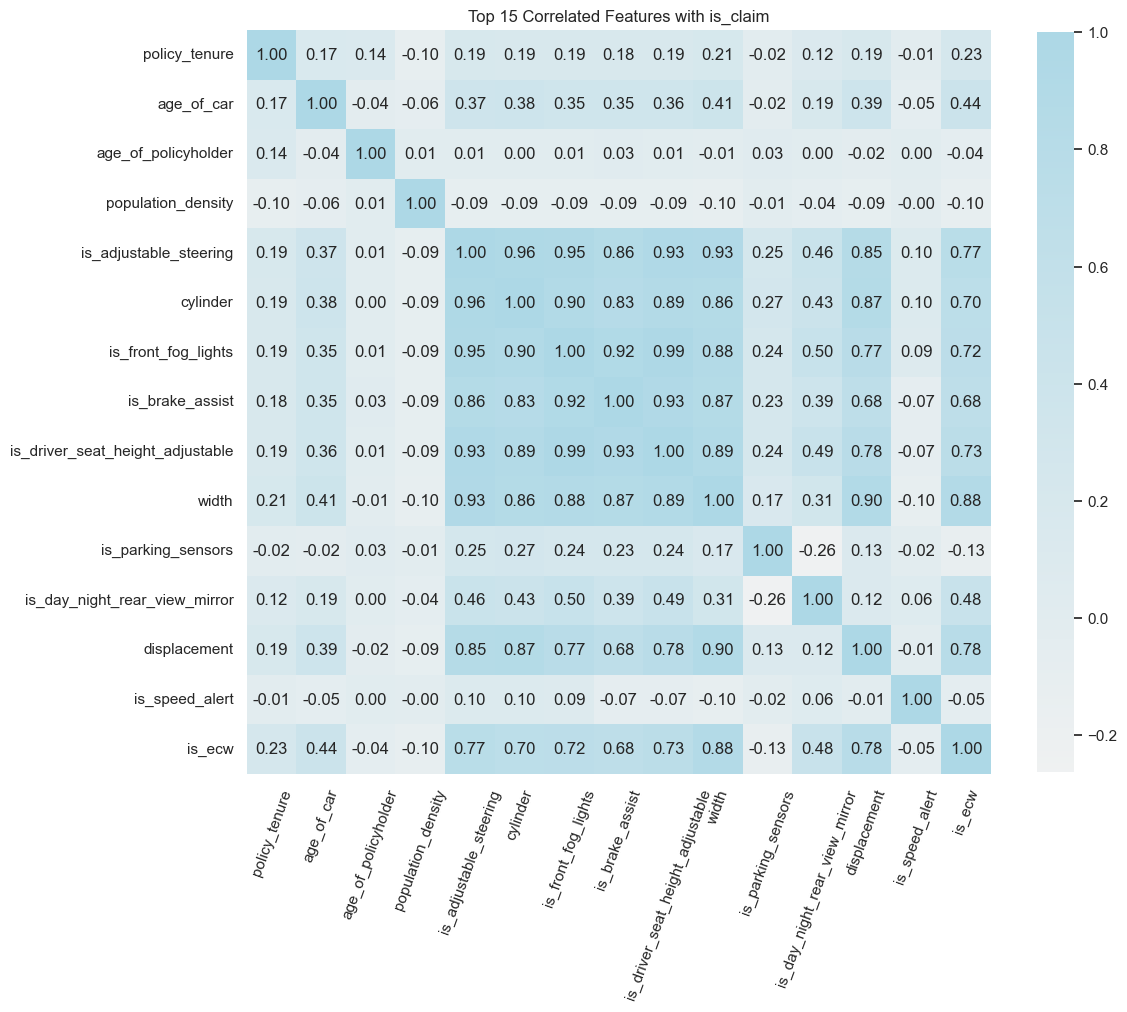

In [17]:

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Extract the correlations with 'is_claim'
is_claim_corr = corr_matrix['is_claim']

# Get the top correlated features (absolute values)
top_corr = is_claim_corr.abs().sort_values(ascending=False)

# Select the top N features (excluding 'is_claim' itself)
top_n = 15  
top_features = top_corr.index[1:top_n + 1]  # Exclude 'is_claim'

# Create a new correlation matrix for the top features
top_corr_matrix = corr_matrix.loc[top_features, top_features]

# Create a heatmap for the top correlated features

# Define a custom color palette
custom_palette = ["#FF0000", "#FFA500", "#FFFF00", "#008000", "#0000FF", "#800080"]  # Example colors (red, orange, yellow, green, blue, purple)

# Create a heatmap for the top correlated features
cmap = sns.light_palette("lightblue", as_cmap=True)  # Replace "blue" with your preferred color

# Create a heatmap for the top correlated features
plt.figure(figsize=(12, 12))
sns.heatmap(top_corr_matrix, annot=True, fmt='.2f', square=True, cmap=cmap, cbar_kws={'shrink': .8})
plt.xticks(rotation = 70)
plt.title(f'Top {top_n} Correlated Features with is_claim')
plt.show()

3. Box Plots for Numerical Features


In [ ]:
df_numeric.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

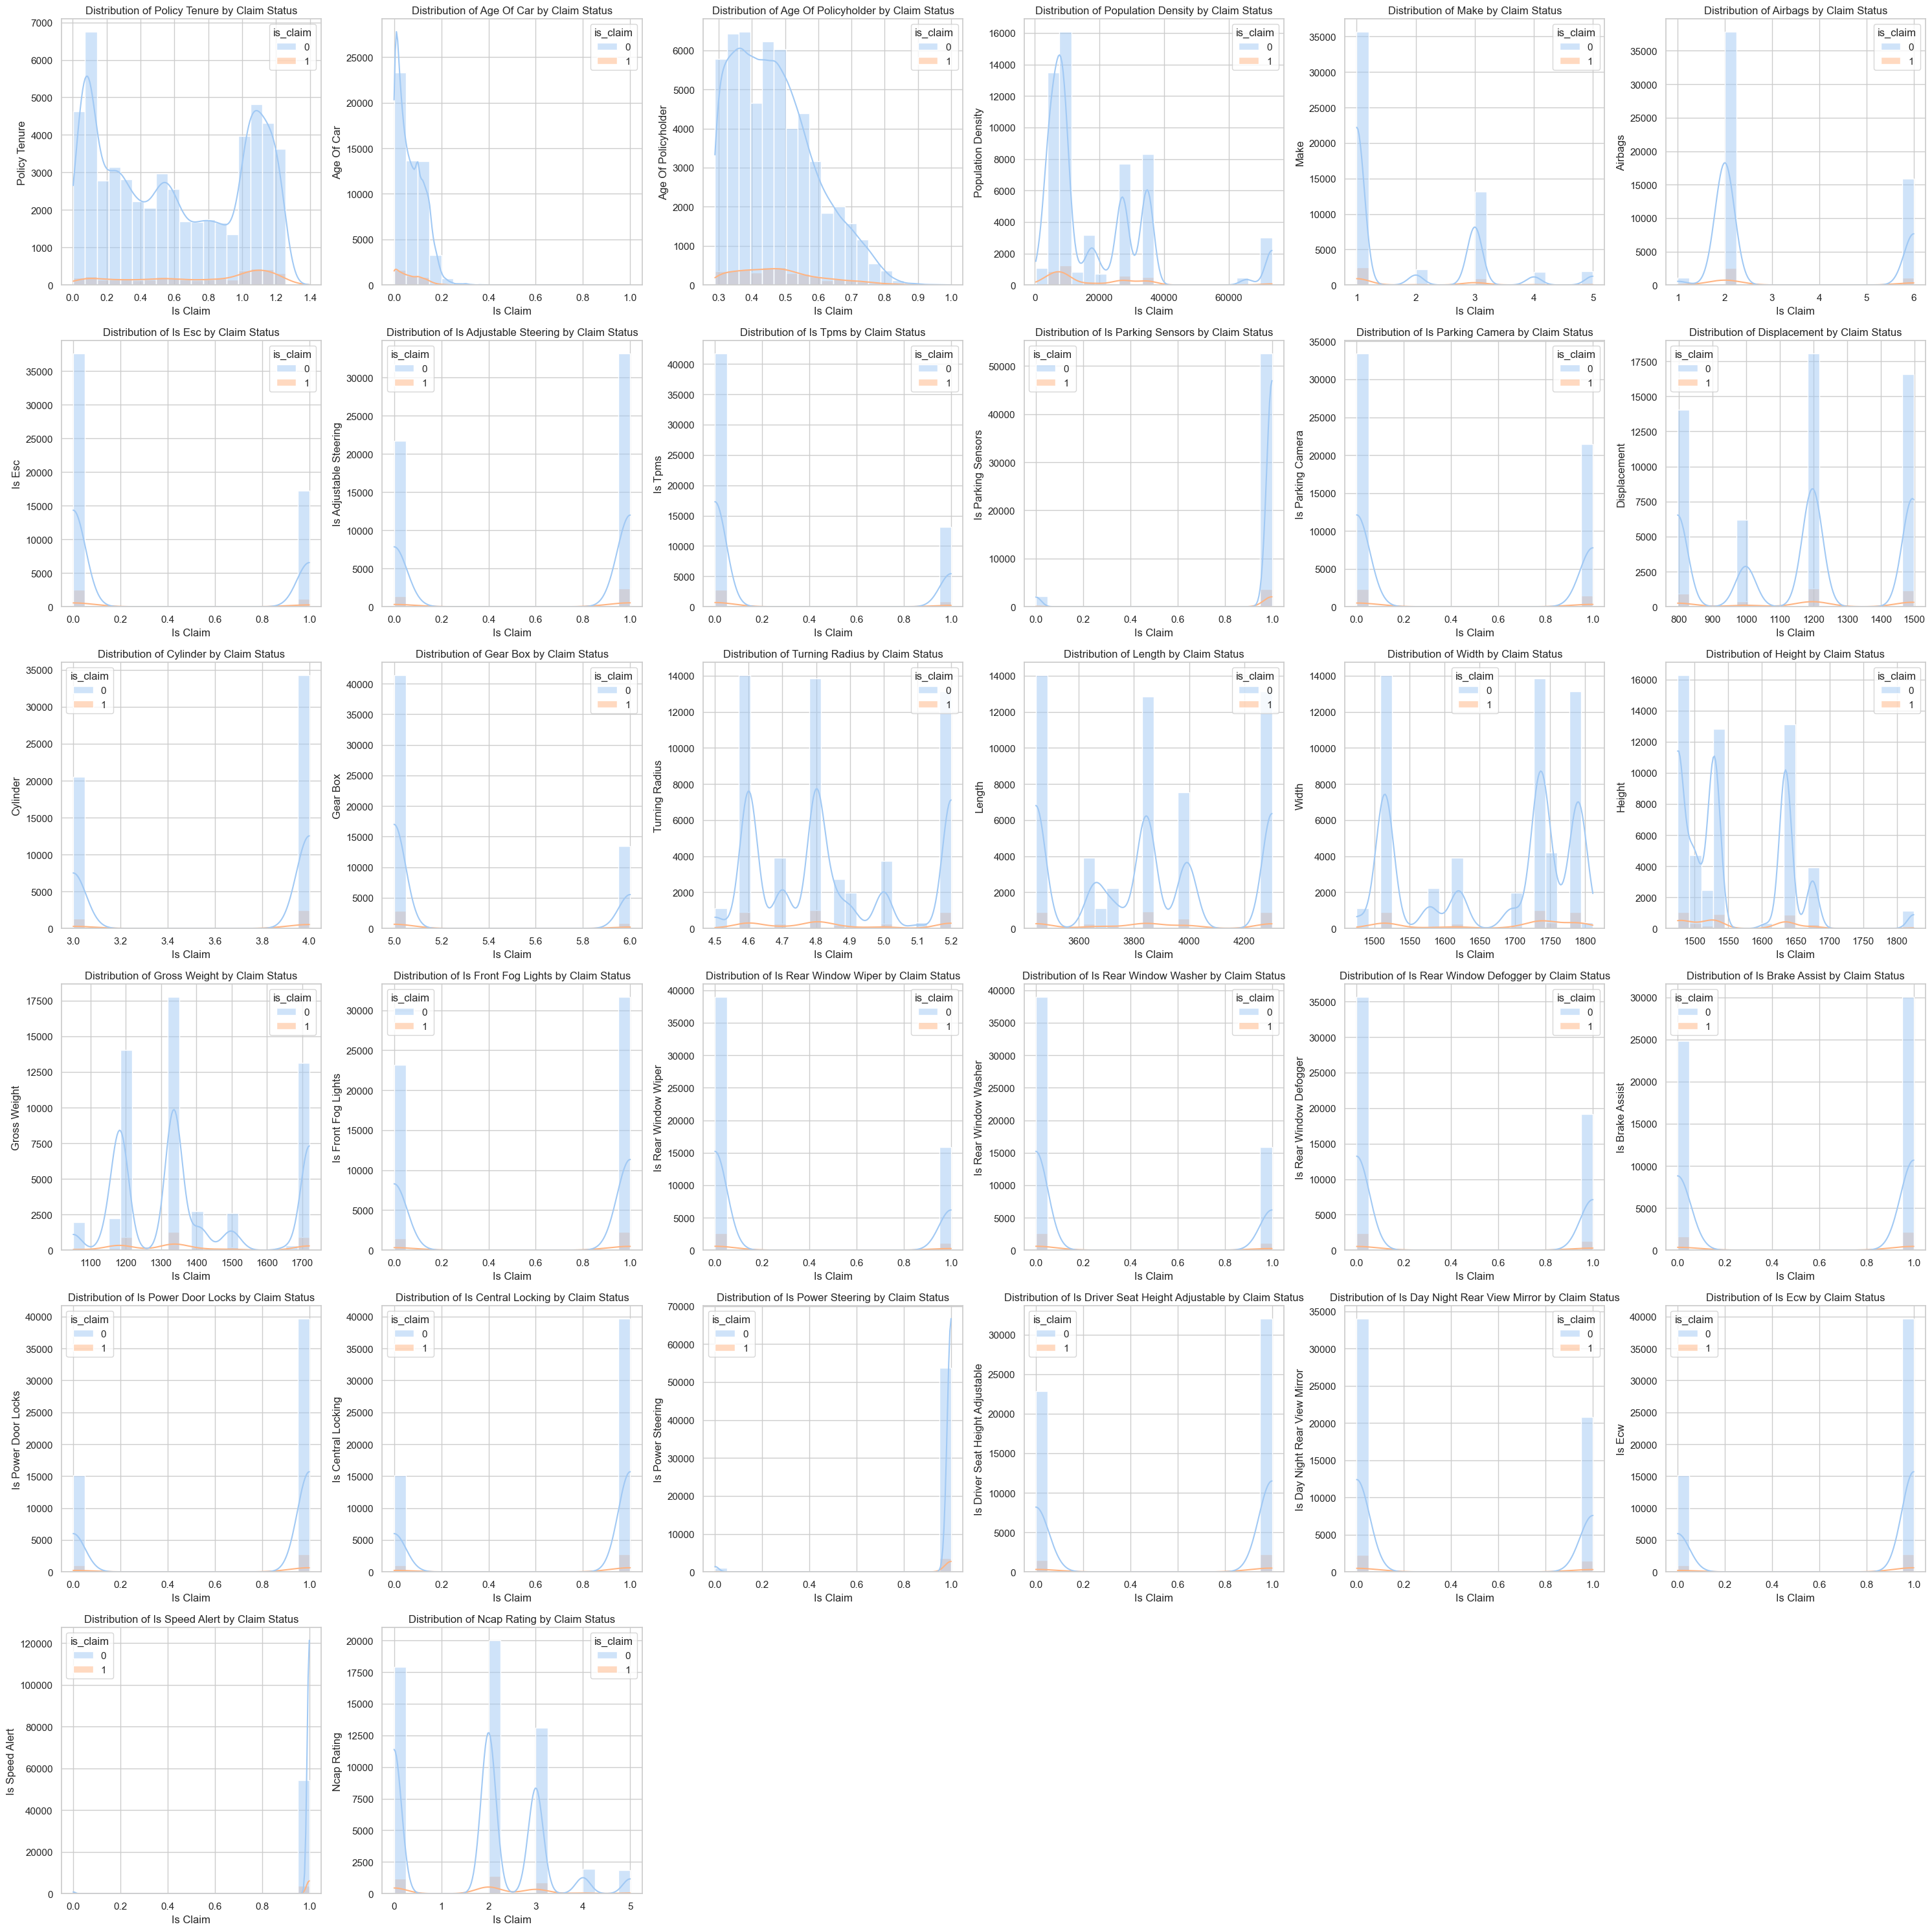

In [ ]:
features_to_plot = [
    'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating'
]

# Create a figure with subplots
n_cols = 6  # Set number of columns for the layout
n_rows = (len(features_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axs = axs.flatten()  # Flatten the array of axes for easier indexing

# Loop through each feature and create a plot in the respective subplot
for i, col in enumerate(features_to_plot):
    if df[col].dtype == 'object':  # Check if the column is categorical
        sns.countplot(x='is_claim', hue=col, data=df, ax=axs[i], palette='pastel')
        axs[i].set_title(f'Claim Status by {col.replace("_", " ").title()}')
    else:
        sns.histplot(data=df, x=col, hue='is_claim', kde=True, ax=axs[i], palette='pastel', bins=20)  # Change to histplot for histograms
        axs[i].set_title(f'Distribution of {col.replace("_", " ").title()} by Claim Status')

    axs[i].set_xlabel('Is Claim')
    axs[i].set_ylabel(col.replace("_", " ").title())

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

4. Count Plots for Categorical Features

In [18]:
df_cat = df.select_dtypes(include='object')


In [19]:
df_cat.columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'rear_brakes_type',
       'transmission_type', 'steering_type'],
      dtype='object')

In [20]:
df_cat.describe(include='all')

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,rear_brakes_type,transmission_type,steering_type
count,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592
unique,58592,22,6,11,3,9,9,11,2,2,3
top,ID00001,C8,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,Drum,Manual,Power
freq,1,13654,18314,14948,20532,17796,17796,14948,44574,38181,33502


In [26]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0


In [32]:
categorical_features = ['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
                        'max_torque', 'max_power', 'engine_type', 'rear_brakes_type',
                        'transmission_type', 'steering_type']

/var/folders/5v/wc8gxzt56gx00tb3h88t55vm0000gn/T/ipykernel_2281/787557344.py:21: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


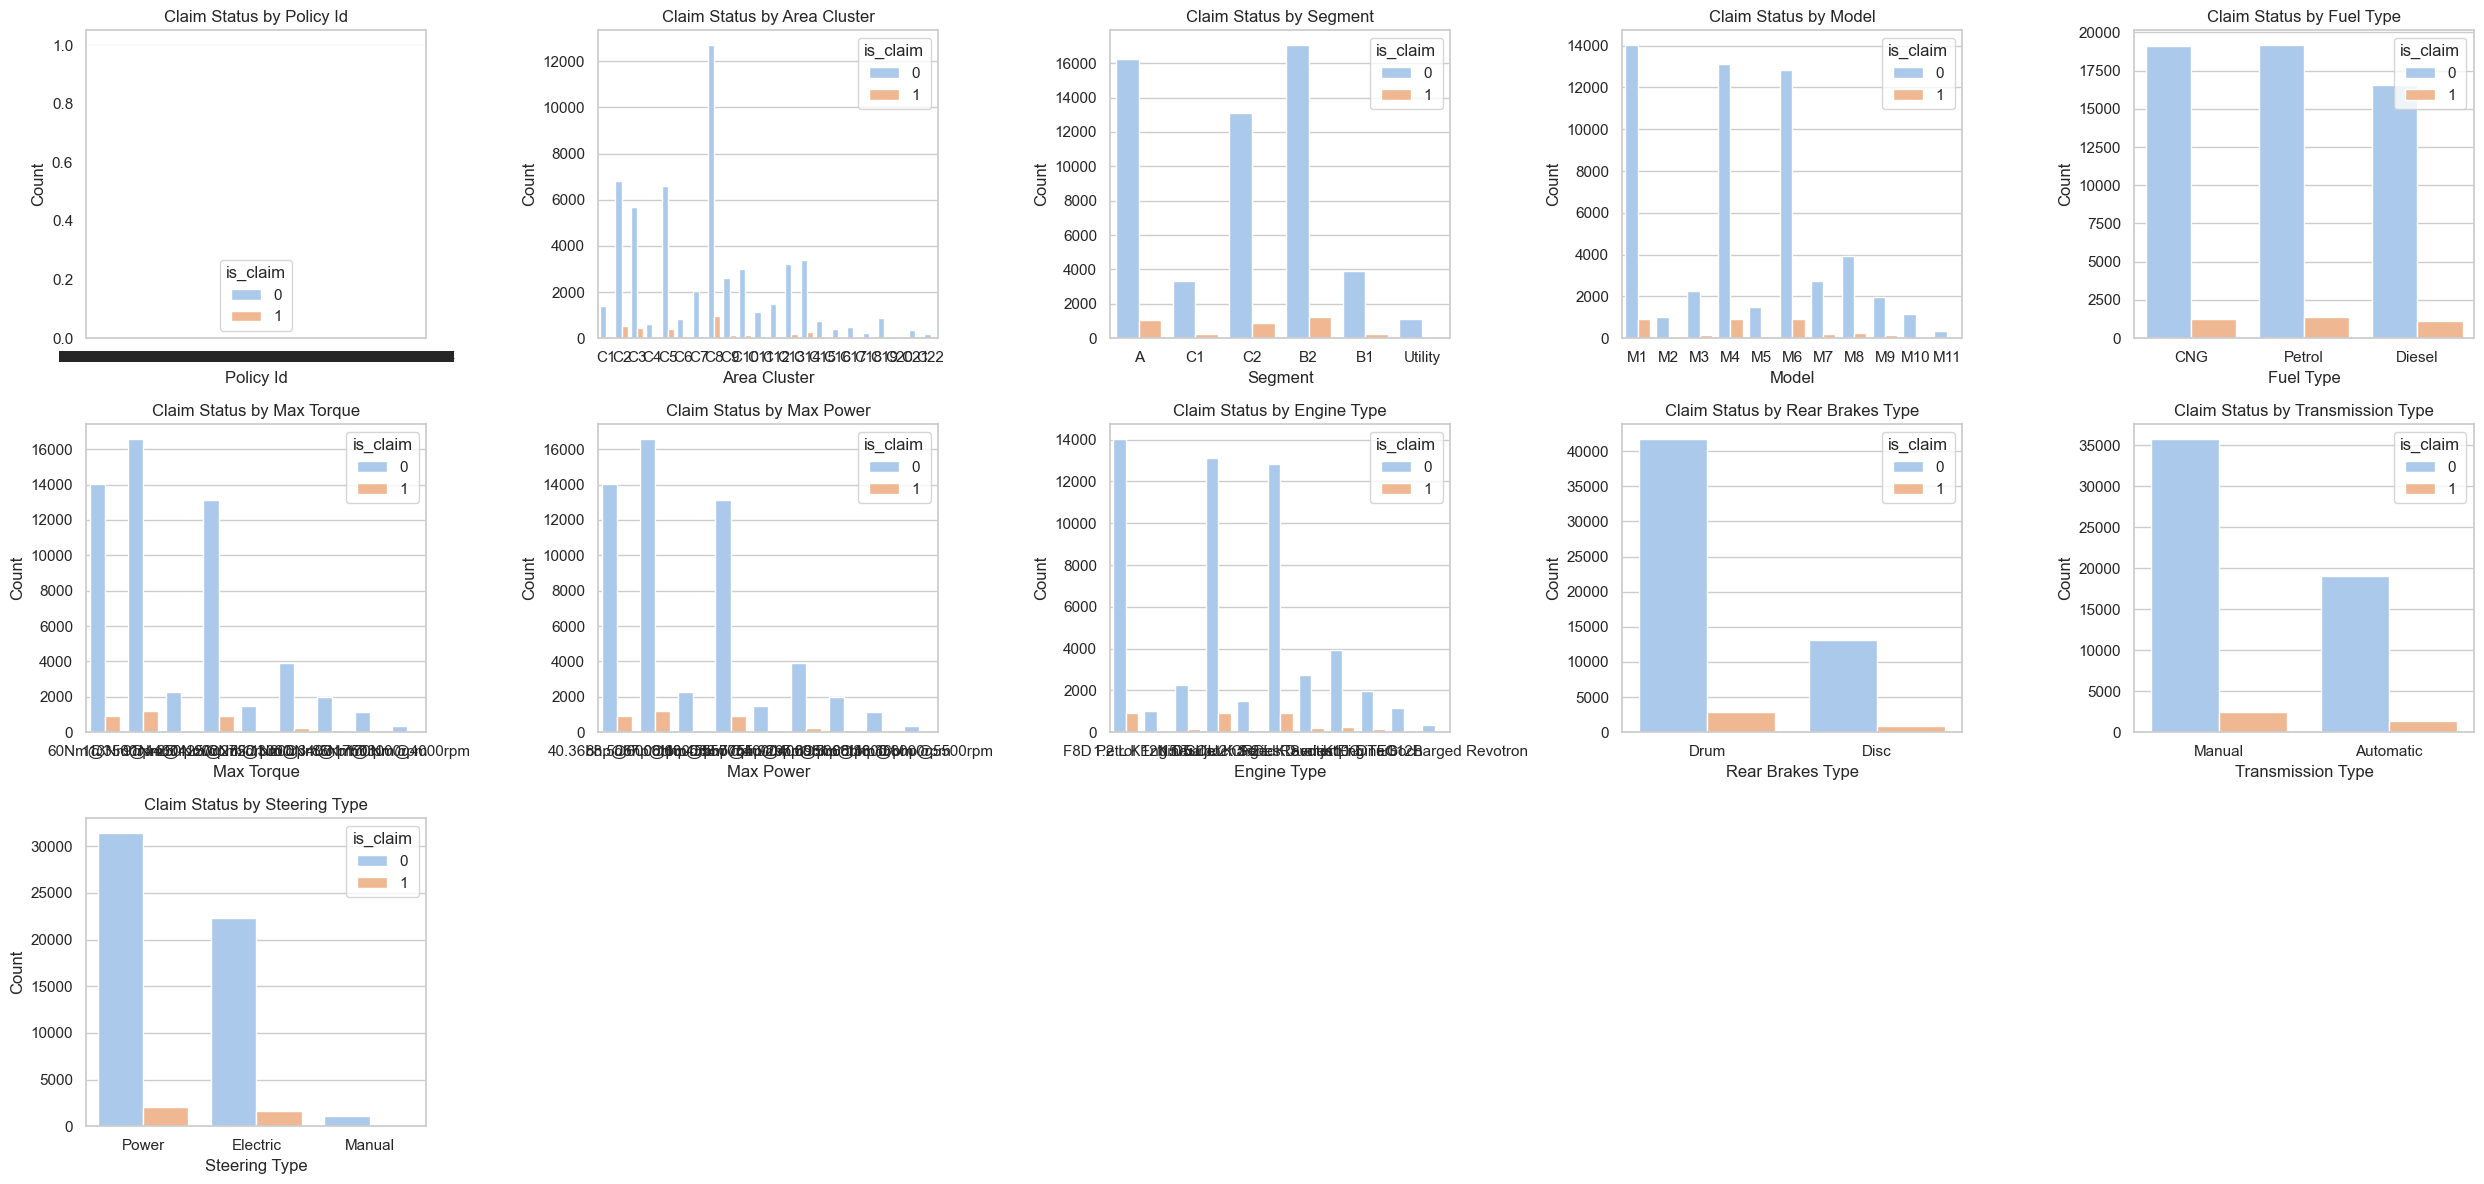

In [31]:
n_cols = 5  
n_rows = (len(categorical_features) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axs = axs.flatten()  # Flatten the array of axes for easy indexing

# Loop through each categorical feature and create a count plot
for i, col in enumerate(categorical_features):
    if col in df.columns:  # Check if the column exists in the DataFrame
        sns.countplot(x=col, hue='is_claim', data=df, ax=axs[i], palette='pastel')
        axs[i].set_title(f'Claim Status by {col.replace("_", " ").title()}')
        axs[i].set_xlabel(col.replace("_", " ").title())
        axs[i].set_ylabel('Count')

# Hide any remaining empty subplots
for j in range(len(categorical_features), len(axs)):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

5. Pair Plot


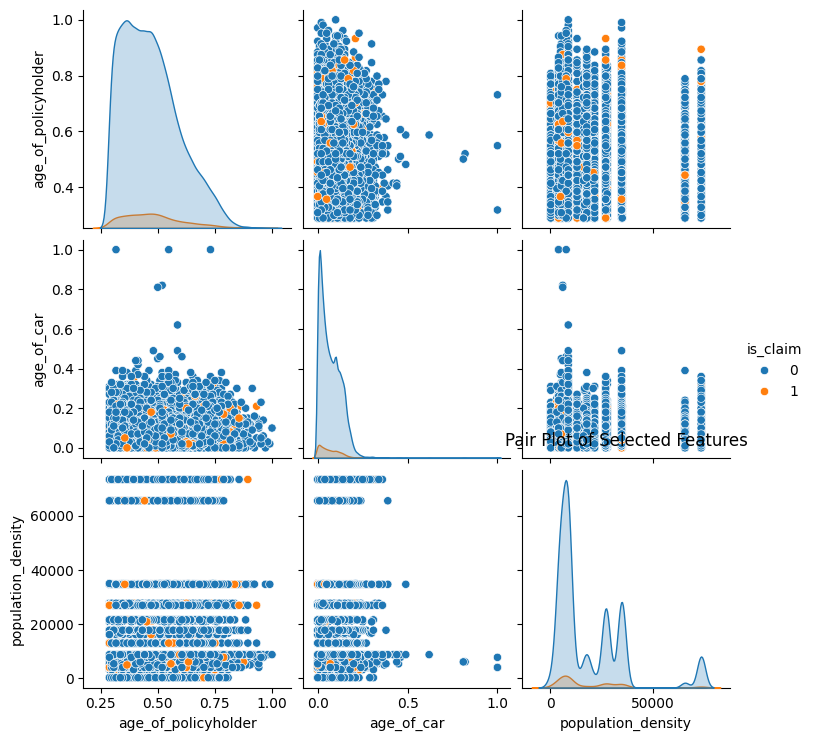

In [ ]:
# pair plot for 'age_of_policyholder', 'age_of_car', 'population_density', 'is_claim'
subset = df[['age_of_policyholder', 'age_of_car', 'population_density', 'is_claim']]

# Create a pair plot
sns.pairplot(subset, hue='is_claim', diag_kind='kde')
plt.title('Pair Plot of Selected Features')
plt.show()

__Encoding Categorical Variables__


In [33]:
df_model = df.drop(columns = 'policy_id')

In [35]:
df_encoded = pd.get_dummies(df_model, drop_first=True)

In [42]:
df_encoded.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,0.314053,0.606329,0.239248,0.959500,0.390634,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,0.579055,0.289425,0.289425,0.350133,0.549171,0.724246,0.724246,0.979366,0.585251,0.380308,0.724246,0.993805,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,0.464142,0.488568,0.426628,0.197131,0.487897,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,0.493715,0.453499,0.453499,0.477016,0.497581,0.446897,0.446897,0.142158,0.492683,0.485467,0.446897,0.078467,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


__Using Z-Score to standardize the features__

In [44]:
from sklearn.preprocessing import StandardScaler

# Assuming df_encode is your encoded DataFrame
features_to_scale = ['height', 'width', 'length', 'turning_radius', 
                     'gear_box', 'cylinder', 'displacement', 
                     'airbags', 'make', 'population_density', 
                     'policy_tenure']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply Z-score normalization to the selected features
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

# Check the result
print(df_encoded[features_to_scale].head())

     height     width    length  turning_radius  gear_box  cylinder  \
0 -0.983846 -1.402768 -1.301882       -1.108893 -0.570334 -1.296417   
1 -0.983846 -1.402768 -1.301882       -1.108893 -0.570334 -1.296417   
2 -0.983846 -1.402768 -1.301882       -1.108893 -0.570334 -1.296417   
3 -0.481470  0.559973  0.464026       -0.231926 -0.570334  0.771357   
4 -0.795455 -0.831789 -0.383610        0.645040 -0.570334 -1.296417   

   displacement   airbags      make  population_density  policy_tenure  
0     -1.375713 -0.620458 -0.671712           -0.783513      -0.230283  
1     -1.375713 -0.620458 -0.671712            0.462975       0.148188  
2     -1.375713 -0.620458 -0.671712           -0.835268       0.555022  
3      0.130093 -0.620458 -0.671712            0.158275       0.697883  
4     -0.613422 -0.620458  0.207812            0.900969      -0.035840  


__Models development__

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


1. Logistic Regression

In [46]:
X = df_encoded.drop('is_claim', axis=1)  # Features
y = df_encoded['is_claim']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[10963     0]
 [  756     0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10963
           1       0.00      0.00      0.00       756

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.90     11719



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metr

2. Random Forest

In [47]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10963     0]
 [  756     0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10963
           1       0.00      0.00      0.00       756

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.90     11719



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metr

3. Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_gb_pred = gb_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_gb_pred))
print(classification_report(y_test, y_gb_pred))


[[10961     2]
 [  756     0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10963
           1       0.00      0.00      0.00       756

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.90     11719



4. Support Vector Machine (SVM)

In [50]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_svm_pred = svm_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_svm_pred))
print(classification_report(y_test, y_svm_pred))


Hyperparameter Tuning with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Set the parameters for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='accuracy', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)


continue...